### Taller 4

## Objetivos

## Actividades a realizar

## Python

En el presente ejemplo, y solo con propósitos pedagógicos, se utlizarán solo dos variables, pendiente y geologia, pero el procedimiento señalado se debera utilizar para todas las variables incorporadas en el modelo de susceptibilidad.

In [3]:
import rasterio as rio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [57]:
raster = rio.open(f'G:\My Drive\PERSONAL\POSGRADOS\PhD_Unal\SIG\MAPAS_edier/scarps_vf.tif')
inventario=raster.read(1)
raster_mask = rio.open('G:\My Drive\PERSONAL\POSGRADOS\PhD_Unal\SIG\MAPAS_edier\Raster_edier/slope_rad')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario

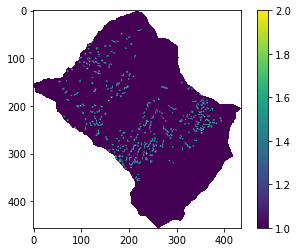

In [58]:
plt.imshow(inventario)
plt.colorbar()

In [59]:
inventario=np.where(inventario==1,0,inventario)
inventario=np.where(inventario==2,1,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]

In [60]:
np.unique(inventario_vector_MenM)

array([0., 1.])

In [61]:
MenM=(inventario_vector_MenM == 1).sum()
print(MenM)

2194


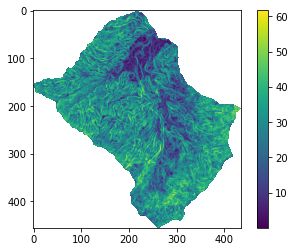

In [62]:
raster = rio.open('G:\My Drive\PERSONAL\POSGRADOS\PhD_Unal\SIG\MAPAS_edier\Raster_edier/slope_rad')
pendiente=raster.read(1)
pendiente=np.where(pendiente==-3.4028234663852886e+38,np.nan,pendiente)
pendiente=pendiente*180/np.pi
plt.imshow(pendiente);
plt.colorbar();
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]

In [63]:
pendiente_vector_MenM

array([ 3.1947842,  4.5560327, 15.029085 , ..., 16.970293 ,  4.04469  ,
        4.289152 ], dtype=float32)

(456, 435)

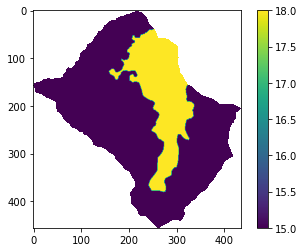

In [64]:
geologia=np.loadtxt('G:\My Drive\PERSONAL\POSGRADOS\PhD_Unal\SIG\MAPAS_edier\ASCII_edier/gamma.asc', skiprows=6)
geologia=np.where(geologia==-9999.,np.nan,geologia)
plt.imshow(geologia);
plt.colorbar();
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
geologia.shape

In [66]:
geologia_vector

array([nan, nan, nan, ..., nan, nan, nan])

In [65]:
df = pd.DataFrame({'geologia':geologia_vector})
print (df['geologia'].value_counts())

15.0    75522
18.0    23539
Name: geologia, dtype: int64


In [67]:
pendiente_serie=pd.Series(pendiente_vector_MenM)
a=b=c=d=e=0
for row in pendiente_serie:
        if (0 <= row) & (row < 10):
          a+=1
        elif (10 <= row) & (row < 20):
          b+=1
        elif (20 <= row) & (row < 30):
          c+=1
        elif (30 <= row) & (row < 35):
          d+=1
        if (row>=35):
          e+=1

total=a+b+c+d+e
print(a,b,c,d,e,total)


6304 15929 29989 18923 27915 99060


In [68]:
pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM

In [78]:
import collections
MenM=(pendienteconMenM > 1)
collections.Counter(MenM)

Counter({False: 96866, True: 2194})

In [79]:
a1=b1=c1=d1=e1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 10):
          a1+=1
        elif (10 <= row) & (row < 20):
          b1+=1
        elif (20 <= row) & (row < 30):
          c1+=1
        elif (30 <= row) & (row < 35):
          d1+=1
        if (row>=35):
          e1+=1

total1=a1+b1+c1+d1+e1
print(a1,b1,c1,d1,e1,total1)

6 37 115 272 1764 2194


In [80]:
x1=a1
x2=total1-a1
x3=a-a1
x4=(b+c+d+e)-(b1+c1+d1+e1)

In [81]:
wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_a, wn_a, c)

-3.168625714154021 0.06448915306282067 -3.2331148672168415


In [84]:
pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<10 )),c,pendiente );

In [85]:
#Clase b
x1=b1
x2=total1-b1
x3=b-b1
x4=(a+c+d+e)-(a1+c1+d1+e1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=10, pendiente_c<20 )),cont,pendiente_c )

#Clase c
x1=c1
x2=total1-c1
x3=c-c1
x4=(a+b+d+e)-(a1+b1+d1+e1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=20, pendiente_c<30 )),cont,pendiente_c )

#Clase d
x1=d1
x2=total1-d1
x3=d-d1
x4=(a+b+c+e)-(a1+b1+c1+e1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=30, pendiente_c<35 )),cont,pendiente_c )

#Clase e
x1=e1
x2=total1-e1
x3=e-e1
x4=(a+b+c+d)-(a1+b1+c1+d1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( pendiente_c>=35,cont,pendiente_c )

<ipython-input-85-48c8d91de844>:19: RuntimeWarning: invalid value encountered in log
  wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
<ipython-input-85-48c8d91de844>:21: RuntimeWarning: invalid value encountered in log
  cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))


In [63]:
a=(geologia == 15).sum()
b=(geologia == 18).sum()
total=a+b

geologiaconMenM=geologia*inventario
a1=(geologiaconMenM == 15).sum()
b1=(geologiaconMenM == 18).sum()
total1=a1+b1

x1=a1
x2=total1-a1
x3=a-a1
x4=b-b1

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where(geologia==15,cont,geologia)

x1=b1
x2=total1-b1
x3=b-b1
x4=a-a1

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where(geologia_c==18,cont,geologia_c)

In [86]:
IS=0.34*pendiente_c+0.66*geologia_c
plt.imshow(IS);
plt.colorbar();

NameError: name 'geologia_c' is not defined

In [66]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('Desktop/IS.TIF', 'w', 
              driver='Gtiff',height=pendiente.shape[0],width=pendiente.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);